In [ ]:
import gymnasium as gym
import highway_env
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.noise import NormalActionNoise

# Create the environment
env = gym.make("highway-v1")

# Wrap the environment
env.reset()

In [2]:
# Create the SAC model
model = DQN(
    "MlpPolicy",
    env,
    policy_kwargs=dict(net_arch=[256, 256]),
    learning_rate=5e-4,
    buffer_size=15000,
    learning_starts=200,
    batch_size=32,
    gamma=0.8,
    train_freq=1,
    gradient_steps=1,
    target_update_interval=50,
    verbose=1,
    tensorboard_log="highway_dqn",
)

# Train the model
model.learn(total_timesteps=10000,tb_log_name = 'DQN_1')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn\DQN_1_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 7.59     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4        |
|    time_elapsed     | 9        |
|    total_timesteps  | 46       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 7.58     |
|    exploration_rate | 0.914    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4        |
|    time_elapsed     | 18       |
|    total_timesteps  | 91       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |


In [7]:
model.learn(total_timesteps=5000, tb_log_name="td3_highway",reset_num_timesteps=False)

Logging to ./td3_highway_tensorboard/td3_highway_7
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.77     |
|    ep_rew_mean     | 0.832    |
| time/              |          |
|    episodes        | 4884     |
|    fps             | 3        |
|    time_elapsed    | 0        |
|    total_timesteps | 8001     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.7      |
|    ep_rew_mean     | 0.796    |
| time/              |          |
|    episodes        | 4888     |
|    fps             | 4        |
|    time_elapsed    | 2        |
|    total_timesteps | 8009     |
| train/             |          |
|    actor_loss      | -1.47    |
|    critic_loss     | 0.303    |
|    learning_rate   | 0.001    |
|    n_updates       | 3008     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.7     

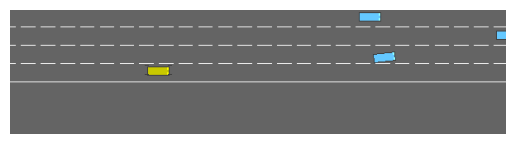

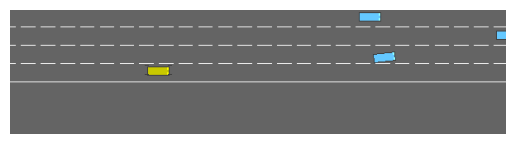

In [8]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
from IPython.display import clear_output, display

# modewl = TD3.load("td3_highway_model")
# # Create the environment
# env = gym.make("highway-v1",render_mode="rgb_array")

# # Configure the environment for continuous actions
# env.unwrapped.configure({
#     "action": {"type": "ContinuousAction"},
#     "duration": 40,  # [s]
#     "lanes_count": 4,
#     "vehicles_count": 50,
#     "controlled_vehicles": 1,
#     "initial_lane_id": None,
#     "ego_spacing": 2,
#     "collision_reward": -1,  
#     "right_lane_reward": 0.4,
#     "high_speed_reward": 0.8,
#     "lane_change_reward": 0,
#     "reward_speed_range": [10, 30],
#     "reverse_reward": -2,
#     "stopping_penalty": -2,
#     "normalize_reward": True,
#     "offroad_terminal": False,
# })

# Reset the environment
obs, info = env.reset()
done = False

# Run the simulation loop
while not done:
    # Sample a random action
    #action = env.action_space.sample()
    action, _ = model.predict(obs, deterministic=False)

    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)


    # Render the environment as an image
    frame = env.render()

    # Display the rendered frame
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)  # Clear the previous frame
    display(plt.gcf())       # Display the current frame

    # Check if the episode is done
    done = truncated


# Close the environment
env.close()

In [6]:
# Save the trained model
model.save("td3_highway_model")

# Close the environment
# env.close()

print("Training complete. Model saved as 'td3_highway_model.zip'.")

Training complete. Model saved as 'td3_highway_model.zip'.
